# **Machine Learning Project: Quantity Prediction & Customer Segmentation**

# **Data Science - Project Based Internship**

## 1. Import Library

In [657]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Import Dataset

### 2.1. Customer

In [658]:
url_c = 'https://raw.githubusercontent.com/viandwip10/PBI-Kalbe-Nutritionals/main/data/Customer.csv'
df_c = pd.read_csv(url_c, delimiter = ';')
df_c.head(3)

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"


### 2.2. Product

In [659]:
url_p = 'https://raw.githubusercontent.com/viandwip10/PBI-Kalbe-Nutritionals/main/data/Product.csv'
df_p = pd.read_csv(url_p, delimiter = ';')
df_p.head(3)

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500


### 2.3. Store

In [660]:
url_s = 'https://raw.githubusercontent.com/viandwip10/PBI-Kalbe-Nutritionals/main/data/Store.csv'
df_s = pd.read_csv(url_s, delimiter = ';')
df_s.head(3)

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"


### 2.4. Transaction

In [661]:
url_t = 'https://raw.githubusercontent.com/viandwip10/PBI-Kalbe-Nutritionals/main/data/Transaction.csv'
df_t = pd.read_csv(url_t, delimiter = ';')
df_t.head(3)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4


## 3. Data Preprocessing

### 3.1. Data Type

In [662]:
# Make list of dataframe name 
df_name = [df_c, df_p, df_s, df_t]

In [663]:
# Checking data types
for i in df_name:
    i.info()
    print('-' * 45)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data colu

Based on the information above, we can see some columns have incorect data types:
- **Income** column should be **float** instead of object
- **Date** column should be **datetime** instead of object
- **Latitude, Longitude** should be **float** instead of object

#### 3.1.1. Changing Data Types

In [664]:
# Income column
df_c['Income'] = df_c['Income'].str.replace(',','.').astype(float)

In [665]:
# Date column
df_t['Date'] = pd.to_datetime(df_t['Date'])

In [666]:
# Latitude and Longitude column
df_s['Latitude'] = df_s['Latitude'].str.replace(',','.').astype(float)
df_s['Longitude'] = df_s['Longitude'].str.replace(',','.').astype(float)

### 3.2. Handling Null Values

In [667]:
# Show the missing values
for i in df_name:
    print(i.isnull().sum())
    print('-' * 22)

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64
----------------------
ProductID       0
Product Name    0
Price           0
dtype: int64
----------------------
StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64
----------------------
TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64
----------------------


From the result above, we can see the Marital Status column have **three missing values**. We will drop them because because it's not a **significant** amount.

In [668]:
# Drop the missing values
df_c.dropna(inplace = True)

In [669]:
# Re-check the missing value
df_c.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

### 3.3. Handling Duplicate Data

In [670]:
# Show duplicate data
for i in df_name:
    print(i.duplicated().sum())

0
0
0
0


From the result above, we can see there is **no duplicate data**.

### 3.4. Data Merging

In [671]:
# Merge dataframe
df_merge = df_t.merge(df_c, on = 'CustomerID')
df_merge = df_merge.merge(df_p.drop(columns = 'Price'), on = 'ProductID')
df_merge = df_merge.merge(df_s, on = 'StoreID')

# Show dataframe
df_merge.head(3)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554


## 4. Machine Learning: ARIMA

### 4.1. Create New Dataframe

In [672]:
# Create new dataframe
df_arima = df_merge.groupby(['Date']).agg(Quantity = ('Qty','sum')).reset_index()

In [673]:
# Show the dataframe
df_arima.head(3)

,Date,Quantity
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76


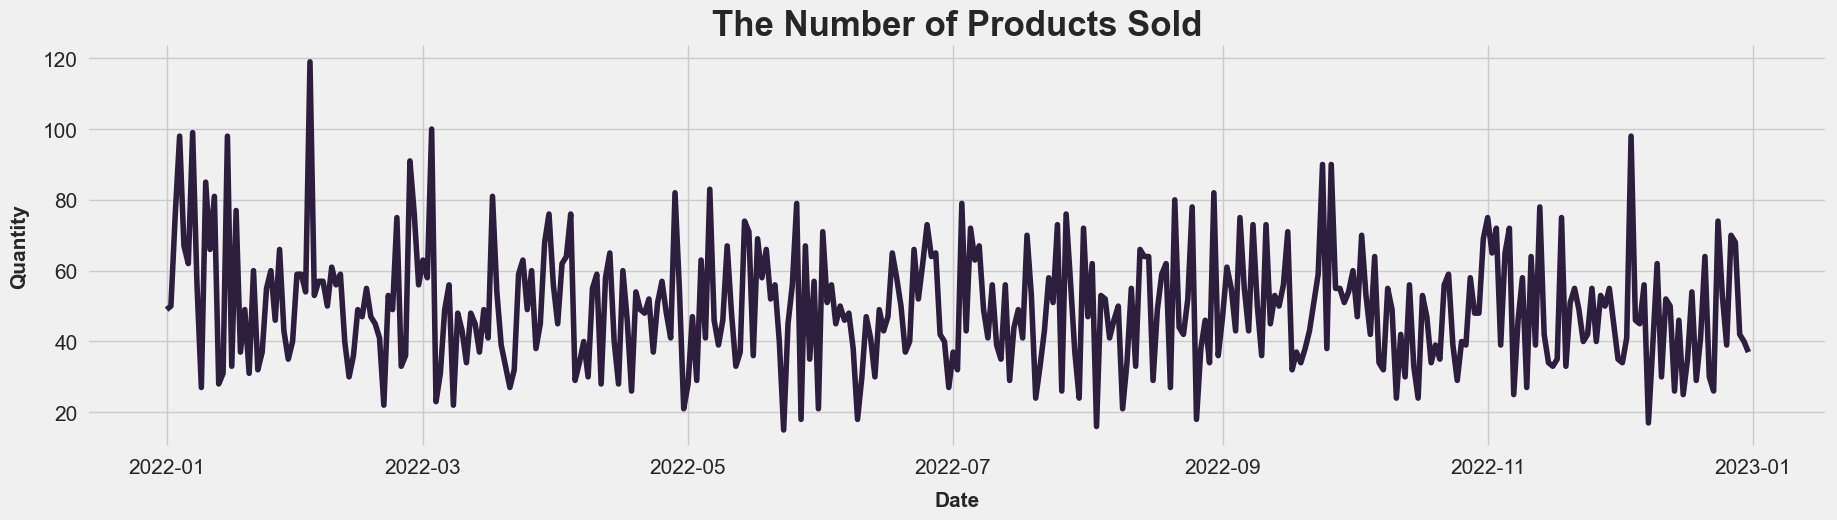

In [674]:
# Data visualization
plt.figure(figsize = (20, 5))
sns.lineplot(data = df_arima, x = 'Date', y = 'Quantity', color = '#2d1e3e')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Date', fontsize = 15, labelpad = 10, fontweight = 'bold')
plt.ylabel('Quantity', fontsize = 15, labelpad = 10, fontweight = 'bold')
plt.title('The Number of Products Sold', fontsize = 25, fontweight = 'bold')
plt.show()

### 4.2. Stationary Check

**H0** = Data is not stationary<br>
**H1** = Data is stationary<br>
**α** = 0.05

In [675]:
# Import library
from statsmodels.tsa.stattools import adfuller

# ADFuller test
hasil = adfuller(df_arima['Quantity'])
print('ADF Statistic: %f' % hasil[0])
print('p-value: %f' % hasil[1])
print('\nConclusion:')

# Conclusion
if (hasil[1]) <= 0.05:
    print('Reject H0. Data is stationary')
else:
    print('Accept H0. Data is not stationary')

ADF Statistic: -19.091514
p-value: 0.000000

Conclusion:
Reject H0. Data is stationary


### 4.3. Splitting Data

We will split data to 80:20 which is **80% for training** and **20% for testing**.

In [676]:
# Splitting data
split_size = round(df_arima.shape[0] * 0.8)
train_data = df_arima[:split_size]
test_data = df_arima[split_size:]
print(train_data.shape, test_data.shape)

(292, 2) (73, 2)


In [677]:
# Show train data
train_data.head(3)

,Date,Quantity
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76


In [678]:
# Show test data
test_data.head(3)

,Date,Quantity
292,2022-10-20,39
293,2022-10-21,35
294,2022-10-22,56


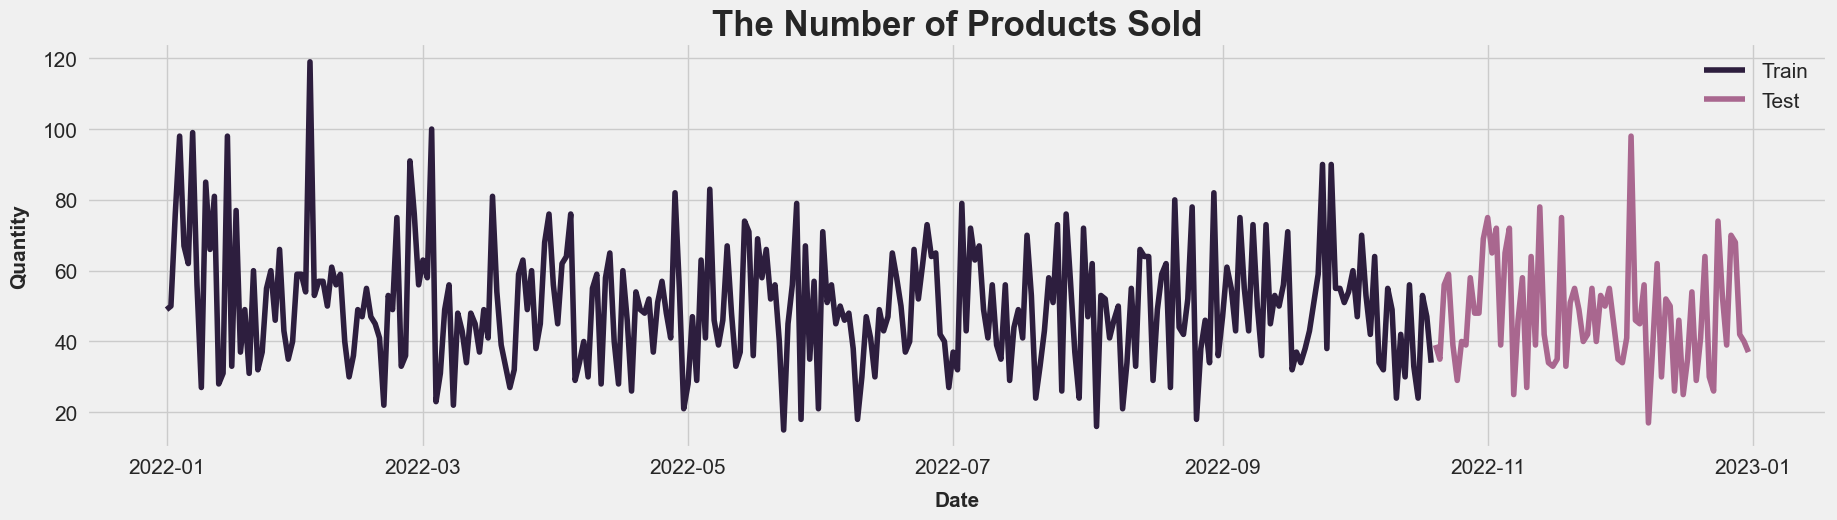

In [679]:
# Data visualization
plt.figure(figsize =(20, 5))
sns.lineplot(train_data, x = train_data['Date'], y = train_data['Quantity'], label = 'Train', c = '#2d1e3e')
sns.lineplot(test_data, x = test_data['Date'], y = test_data['Quantity'], label = 'Test', c = '#a9678f')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Date', fontsize = 15, labelpad = 10, fontweight = 'bold')
plt.ylabel('Quantity', fontsize = 15, labelpad = 10, fontweight = 'bold')

# Add title
plt.title('The Number of Products Sold', fontsize = 25, fontweight = 'bold')

# Add legend
plt.legend(fontsize=15)

# Show the graph
plt.show()

### 4.4. ACF and PACF plots

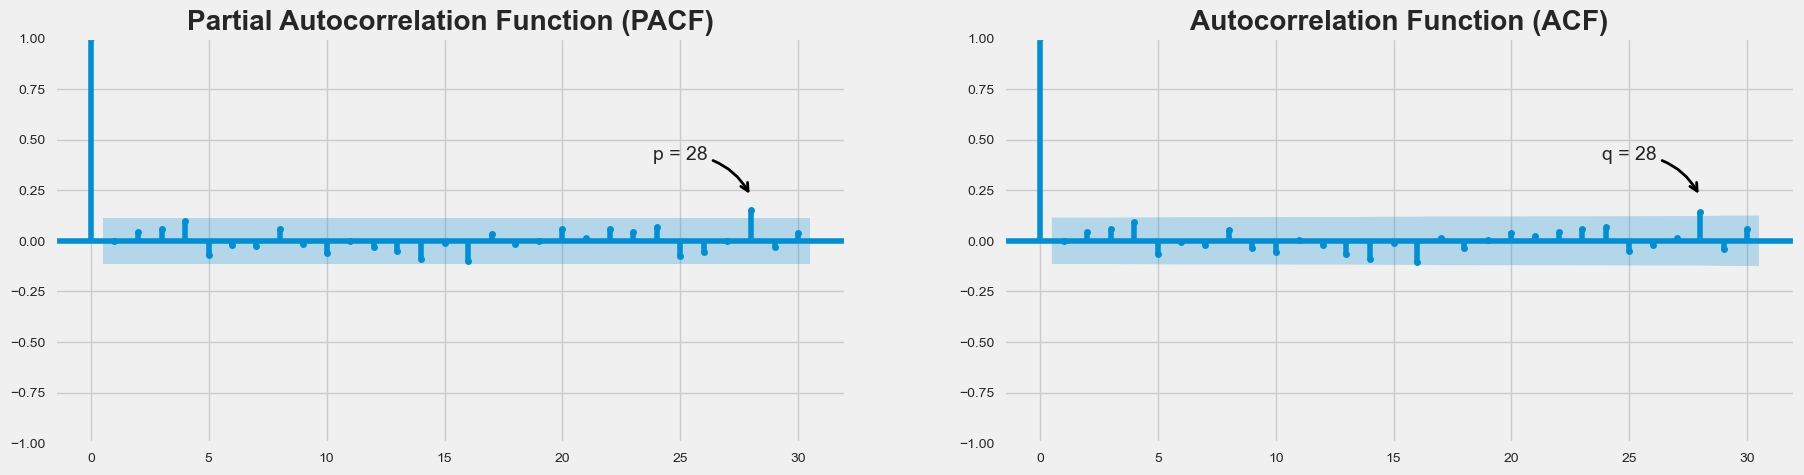

In [680]:
# Import library
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Adjust figure size
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Make plots
plot_pacf(train_data['Quantity'], lags=30, ax=axes[0])
plot_acf(train_data['Quantity'], lags=30, ax=axes[1])

# Add title
axes[0].set_title("Partial Autocorrelation Function (PACF)", fontweight = 'bold')
axes[1].set_title("Autocorrelation Function (ACF)", fontweight = 'bold')

# Add anotastion
axes[0].annotate('p = 28', xy=(28, 0.22), xytext=(25, 0.4),
                  arrowprops=dict(facecolor='steelblue', arrowstyle="->", connectionstyle="arc3, rad=-.3", color = 'black', linewidth = 2), ha='center')
axes[1].annotate('q = 28', xy=(28, 0.22), xytext=(25, 0.4),
                  arrowprops=dict(facecolor='steelblue', arrowstyle="->", connectionstyle="arc3, rad=-.3", color = 'black', linewidth = 2), ha='center')

# Show the graph
plt.show()

### 4.5. Select ARIMA Parameters (p,d,q)

Based on the **Augmented Dicky-Fuller test**, the p-value is 0.00 which is lower than 0.05, thus we will reject H0 and accept H1. Therefore, data is **stationary** and no further differencing is required or **d = 0**. Meanwhile, based on **PACF and ACF plots**, we can see see that the only lag that is out of significant limit is the 28th lag for both PACF and ACF plots. Therefore, **we will use 28 for p and q values**.

### 4.6. Model Training

In [681]:
# Import library
from statsmodels.tsa.arima.model import ARIMA

# Training model
model = ARIMA(train_data['Quantity'], order = (28,0,28))
model = model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:               Quantity   No. Observations:                  292
Model:               ARIMA(28, 0, 28)   Log Likelihood               -1207.645
Date:                Sun, 29 Oct 2023   AIC                           2531.289
Time:                        13:18:26   BIC                           2744.541
Sample:                             0   HQIC                          2616.709
                                - 292                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.2248      2.313     21.715      0.000      45.692      54.758
ar.L1          0.1749      0.394      0.444      0.657      -0.597       0.947
ar.L2          0.3169      0.351      0.903      0.3

### 4.7. Model Validation

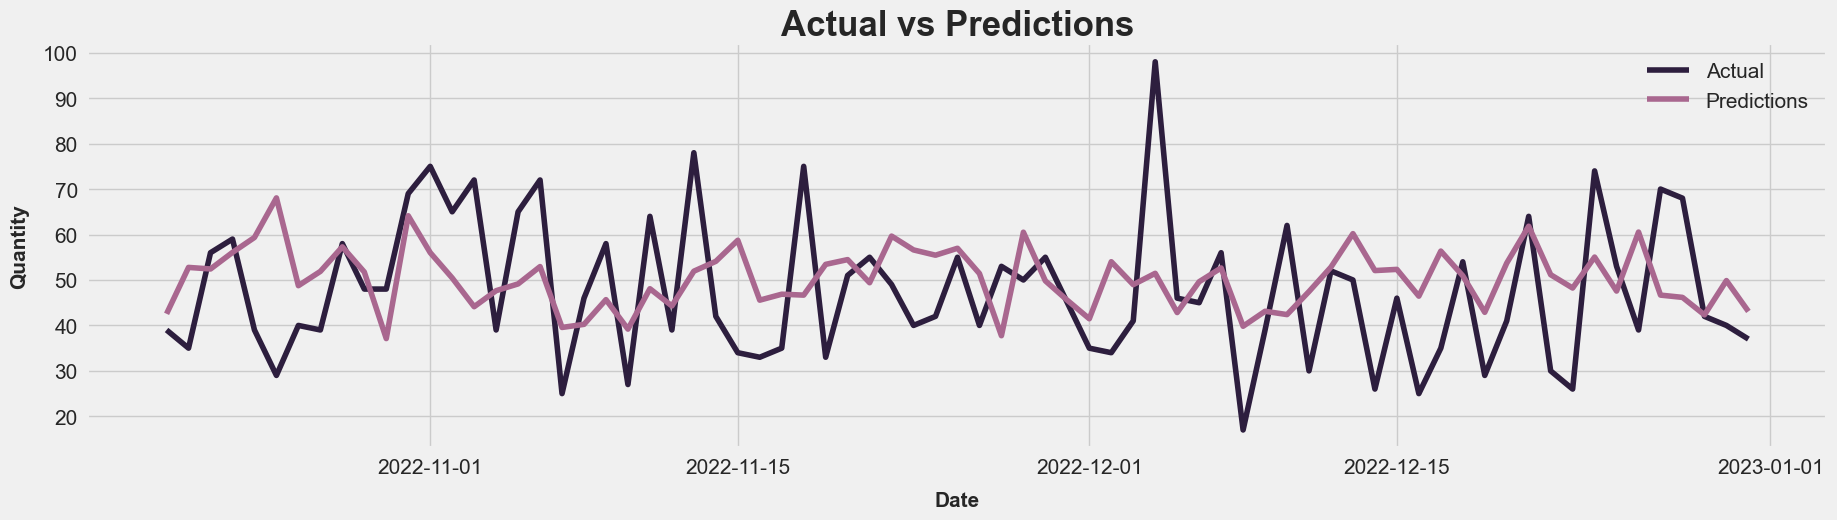

In [682]:
# Predict data test
predictions = model.forecast(steps = len(test_data))

# Adjust figure sizze
plt.figure(figsize=(20, 5))

# Data visualization
sns.lineplot(test_data, x = test_data['Date'], y = test_data['Quantity'], label = 'Actual', c = '#2d1e3e')
sns.lineplot(test_data, x = test_data['Date'], y = predictions, label = 'Predictions', c = '#a9678f')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Date', fontsize = 15, labelpad = 10, fontweight = 'bold')
plt.ylabel('Quantity', fontsize = 15, labelpad = 10, fontweight = 'bold')

# Add title
plt.title('Actual vs Predictions', fontsize = 25, fontweight = 'bold')

# Add legend
plt.legend(fontsize = 15)

# Show the graph
plt.show()

### 4.8. Model Evaluation

In [683]:
# Import library
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Metrics for model evaluation
mae = mean_absolute_error (test_data['Quantity'], predictions.values)
mse = mean_squared_error (test_data['Quantity'], predictions.values)
rmse = np.sqrt (mean_squared_error(test_data['Quantity'], predictions.values))
mape = mean_absolute_percentage_error(test_data['Quantity'], predictions.values) * 100

# Print the rsult
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 13.09
Mean Squared Error (MSE): 255.21
Root Mean Squared Error (RMSE): 15.98
Mean Absolute Percentage Error (MAPE): 31.86%


### 4.9. Future Prediction

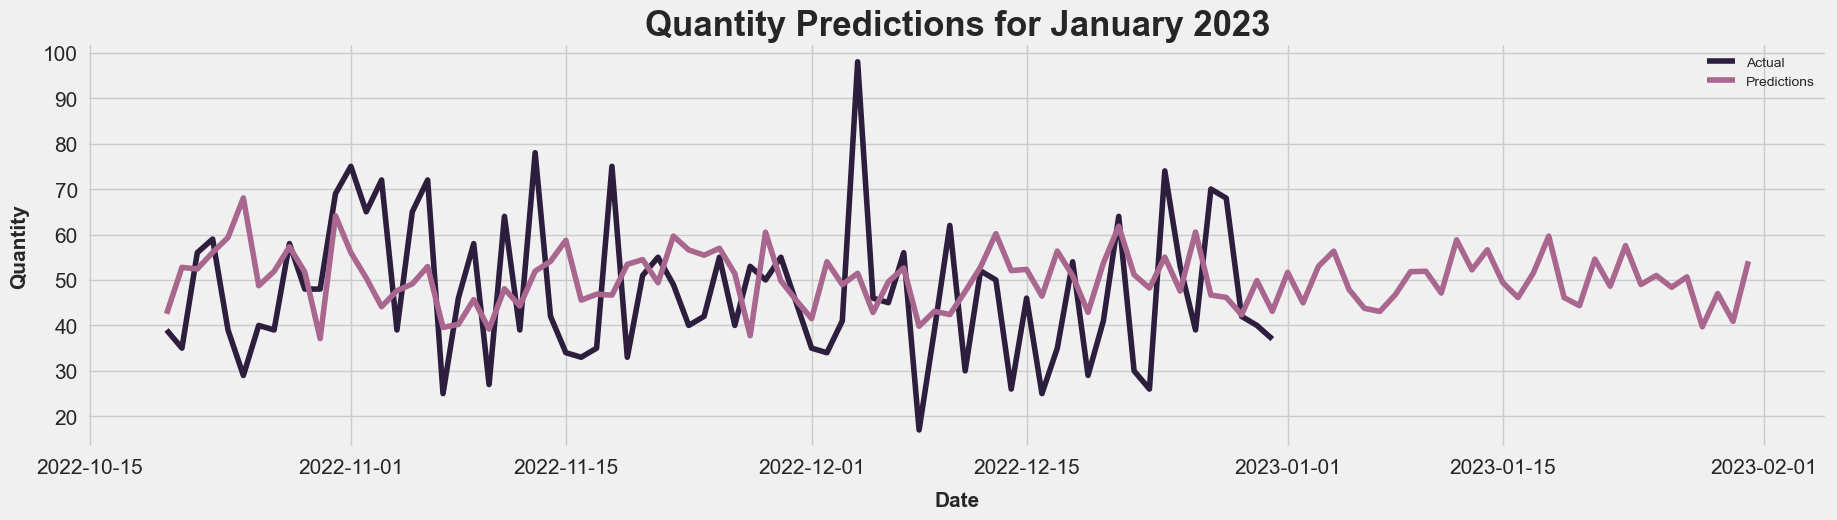

In [684]:
# Predict quantity for January 2023
future_predictions = model.forecast(steps = len(test_data) + 31)
future_predictions.index = pd.date_range(start = test_data['Date'].iloc[0], periods=len(test_data) + 31)

# Adjust figure size
plt.figure(figsize=(20, 5))

# Data visualization
sns.lineplot(test_data, x = test_data['Date'], y = test_data['Quantity'], label='Actual', c = '#2d1e3e')
sns.lineplot(future_predictions, x = future_predictions.index, y = future_predictions, label='Predictions', c = '#a9678f')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Date', fontsize = 15, labelpad = 10, fontweight = 'bold')
plt.ylabel('Quantity', fontsize = 15, labelpad = 10, fontweight = 'bold')

# Add title
plt.title('Quantity Predictions for January 2023', fontsize = 25, fontweight = 'bold')

# Show the graph
plt.show()

In [685]:
# Show the descriptive statistics
future_predictions[-31:].describe()

count    31.000000
mean     49.833919
std       5.093588
min      39.702886
25%      46.433148
50%      49.450170
75%      52.610673
max      59.650834
Name: predicted_mean, dtype: float64

## 5. Machine Learning: K-Means Clustering

### 5.1. Make New DataFrame

In [686]:
# Merge dataframe
df_clustering = df_merge.groupby(['CustomerID']).agg(
    Transaction = ('TransactionID','count'),
    Quantity = ('Qty','sum'),
    TotalAmount = ('TotalAmount','sum')).reset_index()

# Show the data
df_clustering.head(3)

,CustomerID,Transaction,Quantity,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200


In [687]:
# Import library
from sklearn.preprocessing import StandardScaler

# Scaling process
scaler = StandardScaler()
scaler.fit(df_clustering.drop(columns = 'CustomerID'))
scaled_data = scaler.transform(df_clustering.drop(columns = 'CustomerID'))

# Show the data
scaled_data

array([[ 1.78828224,  1.50893374,  2.10242393],
       [ 0.55344971,  1.27289149,  0.24634281],
       [ 1.17086598,  1.19421074,  0.67942841],
       ...,
       [ 2.09699037,  2.13837973,  1.81236104],
       [-0.06396655,  0.09268025,  0.49542729],
       [ 0.55344971,  0.09268025,  0.62398702]])

### 5.2. Elbow Method

In [688]:
# Import library
from sklearn.cluster import KMeans

# Make inertia list
inertia = []

# Calculate inertia value
for i in range (1,11):
    kmeans_elbow = KMeans(n_clusters = i, random_state = 42)
    kmeans_elbow.fit(scaled_data)
    inertia.append(kmeans_elbow.inertia_)

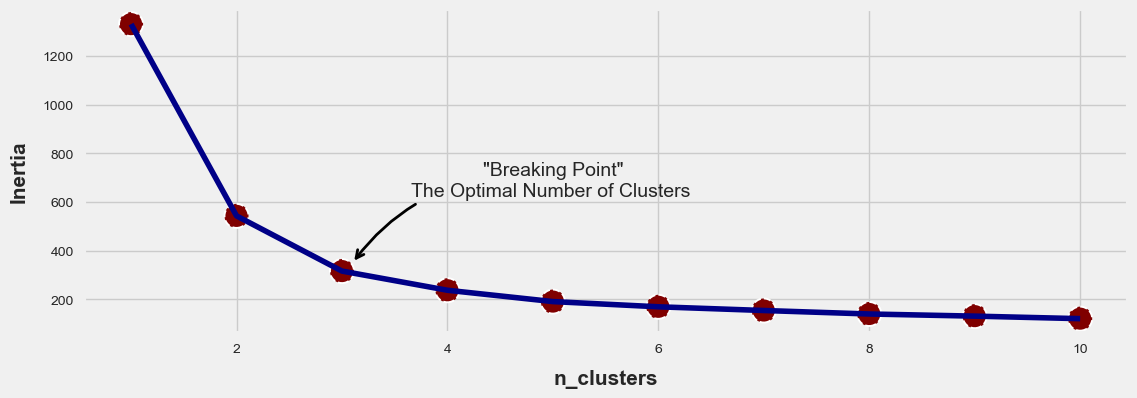

In [689]:
# Make a graph
plt.figure(figsize = (12,4))
sns.lineplot(x=range(1, 11), y = inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y = inertia, s = 300, color = '#800000',  linestyle='--')
plt.annotate('"Breaking Point"\nThe Optimal Number of Clusters ', xy=(3.1, 350), xytext=(5, 625),
             arrowprops=dict(facecolor='steelblue', arrowstyle="->", connectionstyle="arc3, rad=.3", color = 'black', linewidth = 2), ha='center')
plt.xlabel('n_clusters', fontsize = 15, labelpad = 10, fontweight = 'bold')
plt.ylabel('Inertia', fontsize = 15, labelpad = 10, fontweight = 'bold')

# Show the graph
plt.show()

From the elbow method above, we can see the optimal number of clusters is at **the breaking point**. After that point, the inertia value starts to decrease linearly. Therefore we can conclude that **the optimal number of clusters is 3**.

### 5.3. Silhoutte Score

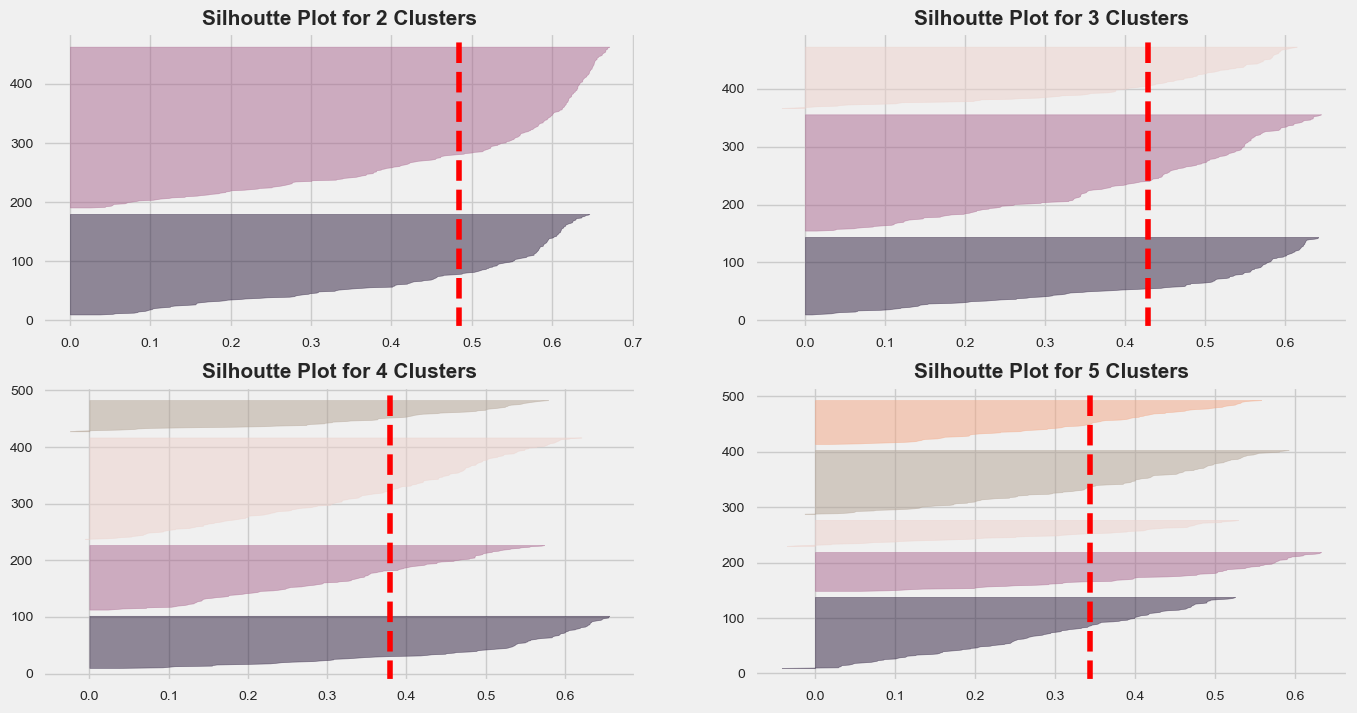

In [690]:
# Import library
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm

# Make subplots
plt.figure(figsize = (15,8))

# Make custom colors
colors = ['#2d1e3e', '#a9678f', '#edd1cb', '#b3a394', '#f3a683']

# Calculate silhoutte score
for i in range(2, 6):
    plt.subplot(2, 2, i-1) 
    plt.title(f'Silhoutte Plot for {i} Clusters', fontsize = 15, fontweight = 'bold')
    kmeans_silhoutte = KMeans(n_clusters = i, random_state = 42) 
    visualizer = SilhouetteVisualizer(kmeans_silhoutte, colors = colors)
    visualizer.fit(scaled_data)

From silhouette plot above, we should choose the number of clusters with a **large coefficient average value** while considering the **proportional distribution** of the clusters formed. Therefore, we can conclude that **the optimal number of clusters is 3**.

### 5.4. K-Means Clustering

In [691]:
# Clustering process
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(scaled_data)
df_clustering['Cluster'] = kmeans.labels_

# Show the data
df_clustering.head(3)

,CustomerID,Transaction,Quantity,TotalAmount,Cluster
0,1,17,60,623300,2
1,2,13,57,392300,2
2,3,15,56,446200,2


### 5.5. Clustering Visualization

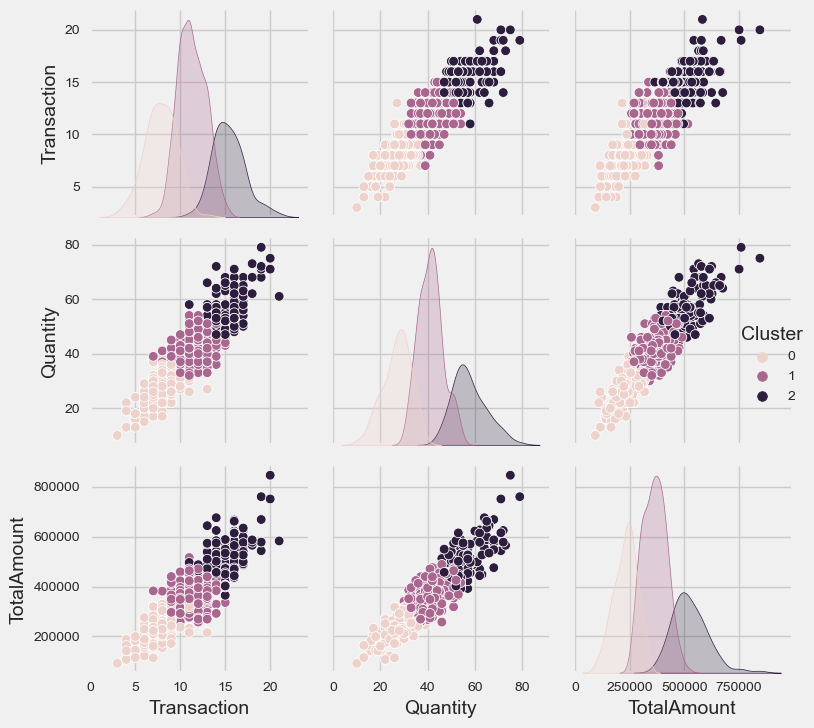

In [692]:
# Visualizing cluster
sns.pairplot(data = df_clustering.drop(columns = 'CustomerID'), diag_kind = 'kde', hue='Cluster')
plt.tight_layout()

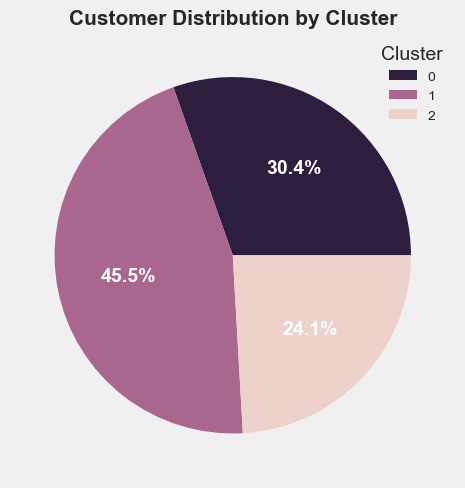

In [693]:
# Make new dataframe
df_pie = df_clustering.groupby('Cluster').agg({'CustomerID': 'count'}).reset_index()

# Make a custom colors
colors = ['#2d1e3e','#a9678f','#edd1cb']

# Make a graph
plt.pie(x = df_pie['CustomerID'], autopct = '%.1f%%', colors = colors, textprops={'color': 'white', 'fontweight' : 600})

# Add title
plt.title('Customer Distribution by Cluster', fontsize = 15, fontweight = 'bold')

# Show the legend
plt.legend(labels = ['0', '1', '2'], title = "Cluster")

# Show the graph
plt.show()

### 5.6. Descriptive Statistics

In [694]:
# Descriptive statistics for each cluster
cluster_statistics = df_clustering.groupby(['Cluster']).agg({
    'CustomerID':'count',
    'Transaction': ['mean', 'median'],  
    'Quantity': ['mean', 'median'],            
    'TotalAmount': ['mean', 'median']}) 

# Show the data
cluster_statistics

CustomerID Transaction          Quantity           TotalAmount  \
             count        mean median       mean median           mean   
Cluster                                                                  
0              135    7.785185    8.0  26.933333   28.0  229388.888889   
1              202   11.282178   11.0  41.188119   41.0  363267.326733   
2              107   15.383178   15.0  57.654206   57.0  525431.775701   

                   
           median  
Cluster            
0        235300.0  
1        362400.0  
2        512400.0

### 5.7. Interpretation

**Cluster 0	: Low-Level Customer**<br>
Customers who make infrequent transactions, buy small quantities, and generate low total amounts.<br>
**Cluster 1	: Mid-Level Customer**<br>
Customers who have moderate transaction frequency, purchase medium quantities, and generate intermediate total amounts.<br>
**Cluster 2	: High-Level Customer** <br>
Customers who make frequent transactions, buy large quantities, and generate high total amounts.

### 5.8. Business Recommendation

**Cluster 0	: Low-Level Customer**<br>
- Use special promotions and discounts to encourage more frequent purchases. We can also use email marketing and personalized offers to re-engage them.<br>
- Offer recommendations for complementary products or services to increase the size of their orders.<br>

**Cluster 1	: Mid-Level Customer**<br>
- Focus on retaining and growing the loyalty using personalized loyalty programs that offer incentives and rewards for continued shopping.<br>
- Analyze their purchase history to identify products or services that are commonly bought together. Promote cross-selling and upselling opportunities to increase their average transaction value.<br>

**Cluster 2	: High-Level Customer** <br>
- Create exclusive offers, early access, and personalized experiences for this cluster to make them feel valued.<br>
- Reward VIP customers for their loyalty and encourage them to refer friends and family to our business. Consider creating a referral program that benefits both parties.<br>
- Identify high-value products or services and promote them to this cluster. Offer bundled packages or discounts for premium offerings.